# First attempt at making nifty work for the MUSTANG data

## Step 1: Load input map

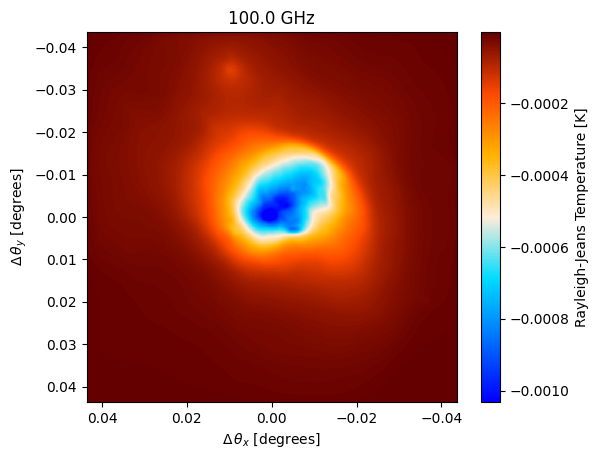

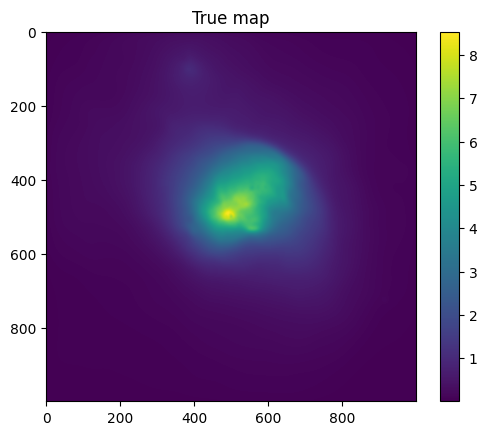

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import maria

import jax.numpy as jnp

map_filename = maria.io.fetch("maps/cluster.fits")

# load in the map from a fits file
input_map = maria.map.read_fits(filename=map_filename, #filename
                                resolution=-8.714e-05, #pixel size in degrees
                                index=0, #index for fits file
                                center=(150, 10), # position in the sky
                                units='Jy/pixel' # Units of the input map 
                               )

input_map.to(units="K_RJ").plot()
plt.show()

# Sava mapdata as jax array
mapdata_input = np.float64((input_map.data[0].T)*-1e7)

plt.imshow(mapdata_input)
plt.colorbar()
plt.title('True map')
plt.show()

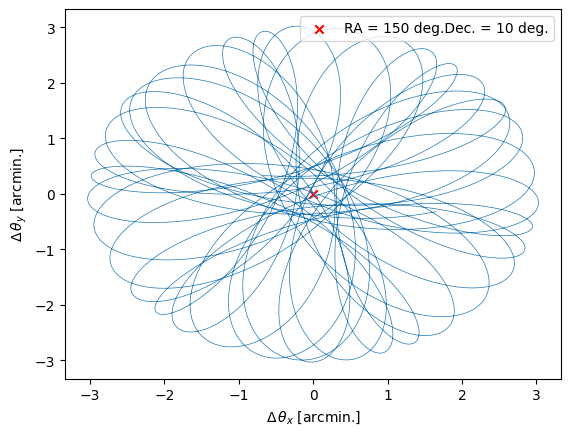

In [2]:
#load the map into maria
plan = maria.get_plan(scan_pattern="daisy", # scanning pattern
                      scan_options={"radius": 0.05, "speed": 0.01}, # in degrees
                      duration=600, # integration time in seconds
                      sample_rate=50, # in Hz
                      scan_center=(150, 10), # position in the sky
                      frame="ra_dec")

plan.plot()

In [23]:
instrument = maria.get_instrument('MUSTANG-2')
# instrument.plot()

sim_truthmap = maria.Simulation(instrument, 
                       plan=plan,
                       site="llano_de_chajnantor", 
                       map=input_map,
                       noise=False,
                      #  atmosphere="2d",
                    #    cmb="generate",
                      )

tod_truthmap = sim_truthmap.run()

sim_noisedmap = maria.Simulation(instrument, 
                       plan=plan,
                       site="llano_de_chajnantor", 
                      #  map=input_map,
                      #  noise=False,
                      #  atmosphere="2d",
                    #    cmb="generate",
                      )

tod_noisedmap = sim_noisedmap.run()

sim_cmb = maria.Simulation(instrument, 
                       plan=plan,
                       site="llano_de_chajnantor", 
                      #  map=input_map,
                       noise=False,
                      #  atmosphere="2d",
                       cmb="generate",
                       cmb_kwargs={"nside": 8192}
                      )

tod_cmb = sim_cmb.run()

sim_atmos = maria.Simulation(instrument, 
                       plan=plan,
                       site="llano_de_chajnantor", 
                      #  map=input_map,
                       noise=False,
                       atmosphere="2d",
                      #  cmb="generate",
                      #  cmb_kwargs={"nside": 8192}
                      )

tod_atmos = sim_atmos.run()

2024-07-18 14:12:08.055 INFO: Constructed instrument.
2024-07-18 14:12:08.056 INFO: Constructed plan.
2024-07-18 14:12:08.057 INFO: Constructed site.
2024-07-18 14:12:08.173 INFO: Constructed boresight.
2024-07-18 14:12:08.389 INFO: Constructed offsets.


Initialized base in 334 ms.


Sampling map (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]
2024-07-18 14:12:10.719 INFO: Constructed instrument.
2024-07-18 14:12:10.720 INFO: Constructed plan.
2024-07-18 14:12:10.720 INFO: Constructed site.
2024-07-18 14:12:10.835 INFO: Constructed boresight.


HERE shape (217, 30000)
HERE 2 shape (217, 30000)


2024-07-18 14:12:11.050 INFO: Constructed offsets.


Initialized base in 330 ms.


Generating noise: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]
2024-07-18 14:12:11.491 INFO: Constructed instrument.
2024-07-18 14:12:11.492 INFO: Constructed plan.
2024-07-18 14:12:11.492 INFO: Constructed site.
2024-07-18 14:12:11.611 INFO: Constructed boresight.
2024-07-18 14:12:11.825 INFO: Constructed offsets.


Initialized base in 333 ms.


Generating CMB:   0%|          | 0/1 [00:00<?, ?it/s]2024-07-18 14:12:12.300 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
2024-07-18 14:12:12.300 INFO: -> fwhm is 0.000000 arcmin
Sampling CMB (m2/f093): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]
2024-07-18 14:12:53.818 INFO: Constructed instrument.
2024-07-18 14:12:53.818 INFO: Constructed plan.
2024-07-18 14:12:53.819 INFO: Constructed site.
2024-07-18 14:12:53.945 INFO: Constructed boresight.
2024-07-18 14:12:54.252 INFO: Constructed offsets.


Initialized base in 435 ms.


Initializing atmospheric layers: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]
Generating atmosphere: 4it [00:00,  4.59it/s]
Computing atm. emission (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

det_power_grid shape: (10, 3, 9)
HERE
(217, 30000)
HERE2
275.4646611427954
HERE3
dask.array<degrees, shape=(217, 30000), dtype=float32, chunksize=(217, 30000), chunktype=numpy.ndarray>


Computing atm. emission (m2/f093): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]


self.data['atmosphere'][band_index] shape (217, 30000)


Computing atm. transmission (m2/f093): 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]


## Re-make map with maria:

calling _run for band m2/f093


Running mapper (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

self.tods: [TOD(shape=(217, 30000), fields=['map'])]
TOD(shape=(217, 30000), fields=['map'])
Band_tod: TOD(shape=(217, 30000), fields=['map'])


Running mapper (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


calling _run for band m2/f093


Running mapper (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

self.tods: [TOD(shape=(217, 30000), fields=['noise'])]
TOD(shape=(217, 30000), fields=['noise'])
Band_tod: TOD(shape=(217, 30000), fields=['noise'])


Running mapper (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


calling _run for band m2/f093


Running mapper (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

self.tods: [TOD(shape=(217, 30000), fields=['cmb'])]
TOD(shape=(217, 30000), fields=['cmb'])
Band_tod: TOD(shape=(217, 30000), fields=['cmb'])


Running mapper (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


calling _run for band m2/f093


Running mapper (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

self.tods: [TOD(shape=(217, 30000), fields=['atmosphere'])]
TOD(shape=(217, 30000), fields=['atmosphere'])
Band_tod: TOD(shape=(217, 30000), fields=['atmosphere'])


Running mapper (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


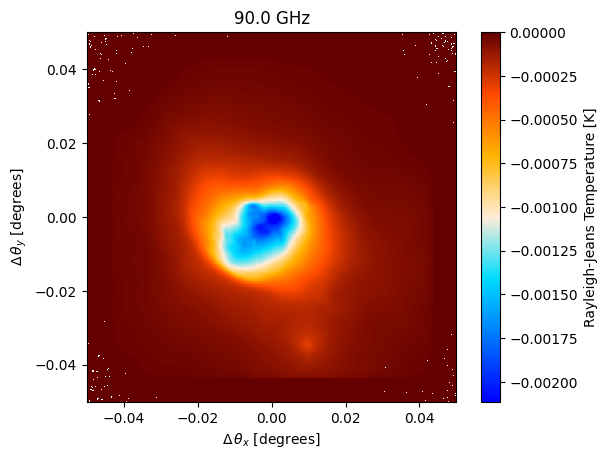

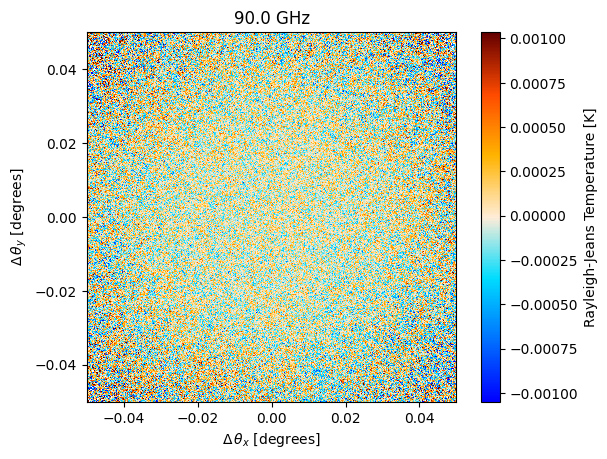

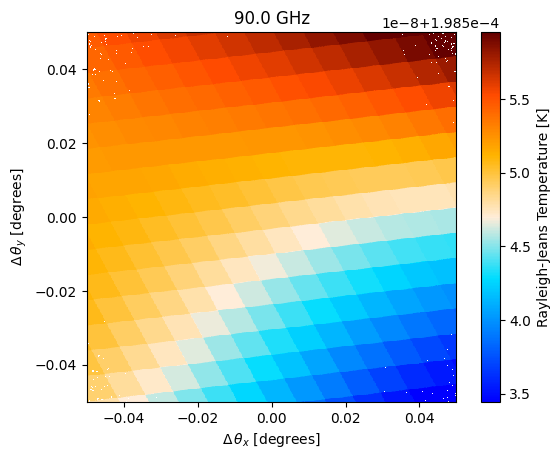

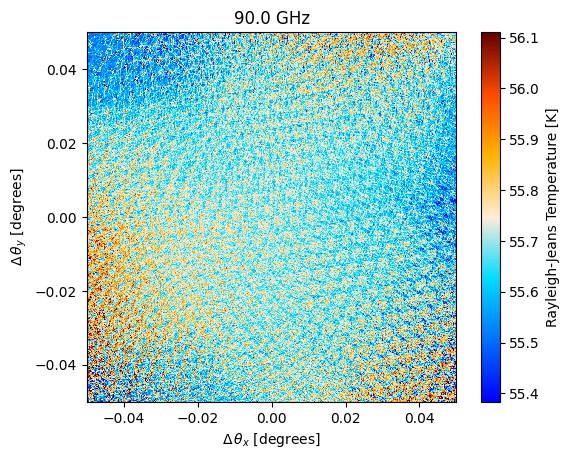

In [57]:

from maria.map.mappers import BinMapper

mapper_truthmap = BinMapper(center=(150, 10), frame="ra_dec", width=0.1, height=0.1, resolution=2e-4, map_postprocessing={"gaussian_filter": {"sigma": 0}} )
mapper_truthmap.add_tods(tod_truthmap)
output_truthmap = mapper_truthmap.run()

mapper_noisedmap = BinMapper(center=(150, 10), frame="ra_dec", width=0.1, height=0.1, resolution=2e-4, map_postprocessing={"gaussian_filter": {"sigma": 0}} )
mapper_noisedmap.add_tods(tod_noisedmap)
output_noisedmap = mapper_noisedmap.run()

mapper_cmb = BinMapper(center=(150, 10), frame="ra_dec", width=0.1, height=0.1, resolution=2e-4, map_postprocessing={"gaussian_filter": {"sigma": 0}} )
mapper_cmb.add_tods(tod_cmb)
output_cmb = mapper_cmb.run()

mapper_atmos = BinMapper(center=(150, 10), frame="ra_dec", width=0.1, height=0.1, resolution=2e-4, map_postprocessing={"gaussian_filter": {"sigma": 0}} )
mapper_atmos.add_tods(tod_atmos)
output_atmos = mapper_atmos.run()

output_truthmap.plot()
output_noisedmap.plot()
output_cmb.plot()
output_atmos.plot()

## Smooth out CMB

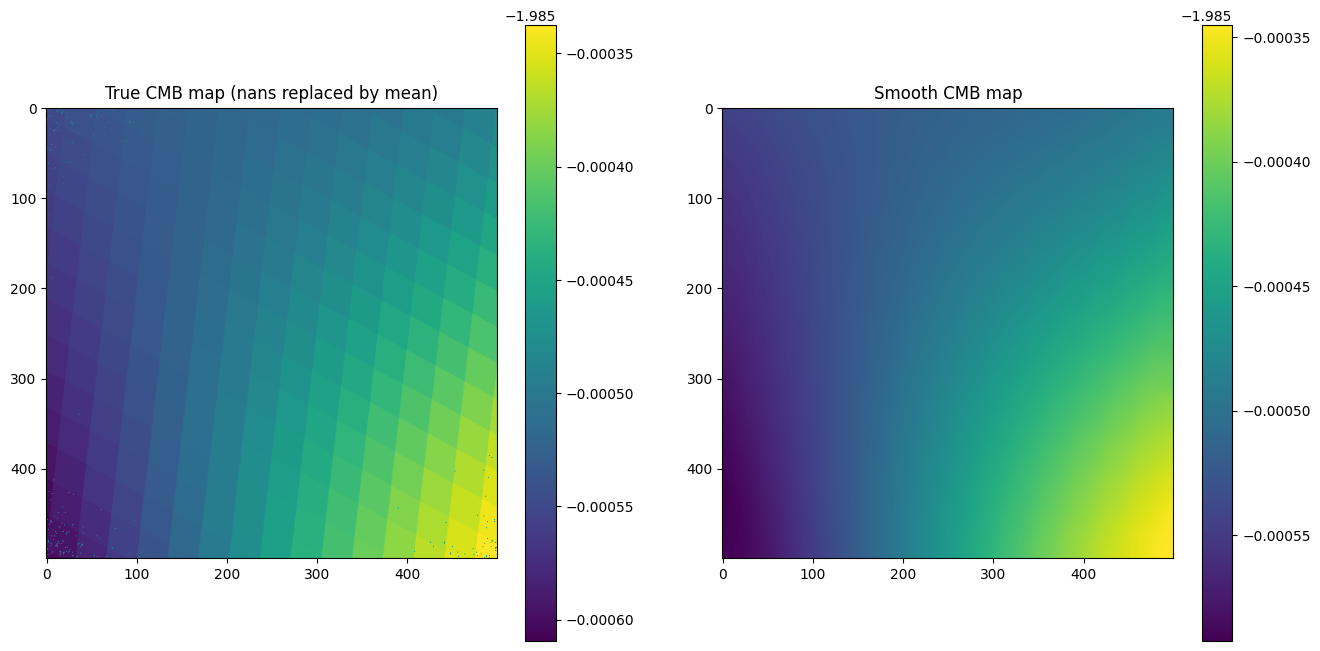

In [96]:
import scipy.ndimage as ndimage

mapdata_cmb_true = np.float64((output_cmb.data[0])*-1e4)
mapdata_cmb_true = np.nan_to_num(mapdata_cmb_true, nan=np.nanmean(mapdata_cmb_true)) # replace nan value by img mean

npix = 12
mapdata_cmb = ndimage.gaussian_filter(mapdata_cmb_true, (npix, npix))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(mapdata_cmb_true)
axes[0].title.set_text('True CMB map (nans replaced by mean)')
fig.colorbar(im0)

im1 = axes[1].imshow(mapdata_cmb)
axes[1].title.set_text('Smooth CMB map')
fig.colorbar(im1)

plt.show()

## Make noisy map

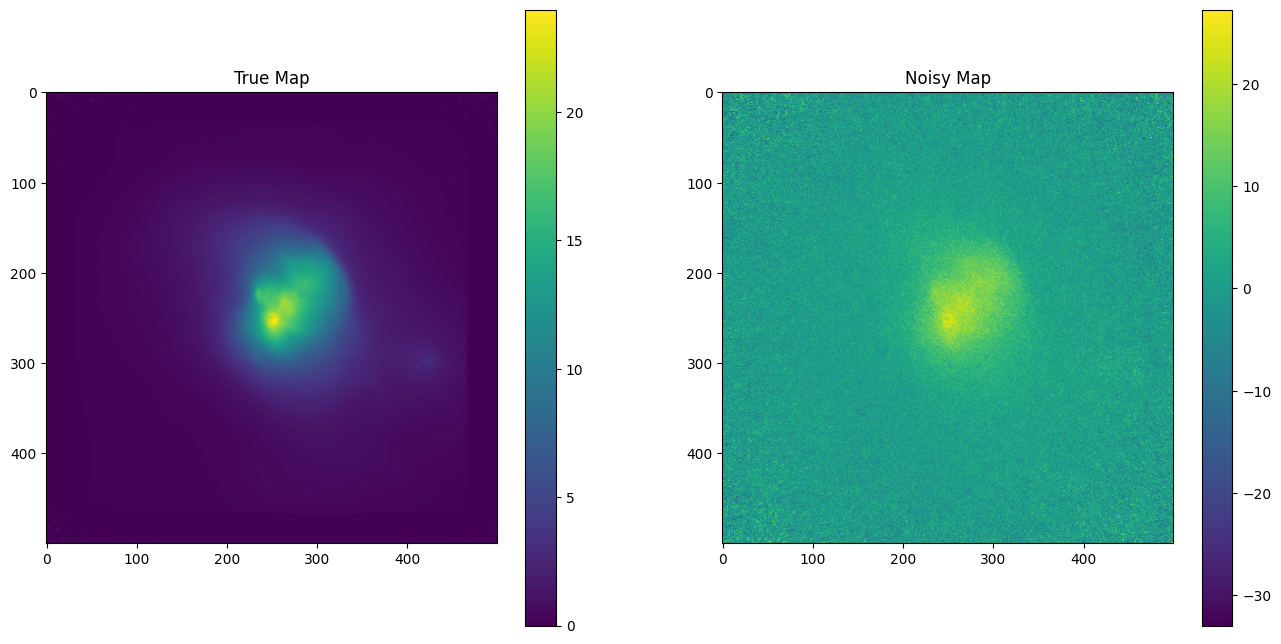

In [83]:
# Make inputdata
mapdata_truth = np.float64((output_truthmap.data[0])*-1e4)
# mapdata_noised = np.float64((output_noisedmap.data[0])*-1e4)*1e-1 + mapdata_truth # 10% noise level
# mapdata_noised = np.float64((output_noisedmap.data[0])*-1e4)*5e-1 + mapdata_truth # 50% noise level
mapdata_noised = np.float64((output_noisedmap.data[0])*-1e4) + mapdata_truth # 100% noise level

# replace nans with 0
mapdata_truth = np.nan_to_num(mapdata_truth, nan=np.nanmean(mapdata_truth)) # replace nan value by img mean
mapdata_noised = np.nan_to_num(mapdata_noised, nan=np.nanmean(mapdata_noised)) # replace nan value by img mean

# Plot Maps
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(mapdata_truth)
axes[0].title.set_text('True Map')
fig.colorbar(im0)

im1 = axes[1].imshow(mapdata_noised)
axes[1].title.set_text('Noisy Map')
fig.colorbar(im1)

plt.show()

## Next, initialise Nifty prior model

In [6]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1,2'

import jax
import nifty8.re as jft
import matplotlib.pyplot as plt

from jax import random

seed = 42
key = random.PRNGKey(seed)

2024-07-18 14:00:10.230 INFO: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2024-07-18 14:00:10.231 INFO: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2024-07-18 14:00:10.289928: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.4 which is older than the ptxas CUDA version (12.5.82). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [7]:
# dims = (128, 128)
# dims = (1000, 1000)
dims = (500, 500)

# correlated field zero mode GP offset and stddev
cf_zm = dict(offset_mean=1.3, offset_std=(1e-1, 1e-1))
# correlated field fluctuations (mostly don't need tuning)
cf_fl = dict(
    fluctuations=(1.0e0, 1e-1), # fluctuations: y-offset in power spectrum in fourier space (zero mode)
    loglogavgslope=(-1.5e0, 1e0), # power-spectrum slope in log-log space in frequency domain (Fourier space)
    flexibility=(1.5e0, 5e-1), # deviation from simple power-law
    asperity=(5e-1, 5e-2), # small scale features in power-law
)

# put together in correlated field model
cfm = jft.CorrelatedFieldMaker("cf")
cfm.set_amplitude_total_offset(**cf_zm)
cfm.add_fluctuations(
    dims, distances=1.0 / dims[0], **cf_fl, prefix="ax1", non_parametric_kind="power"
)
gp = cfm.finalize()

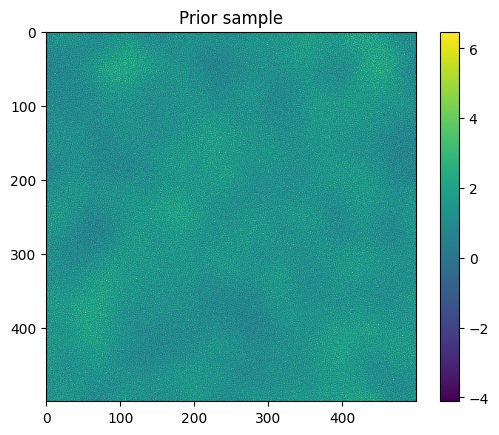

In [8]:
# Draw sample from prior model and plot:

key, sub = random.split(key)
xi = jft.random_like(sub, gp.domain) # generate std normal parameters 
res = gp(xi) # draw sample from gp

plt.imshow(res)
plt.colorbar()
plt.title('Prior sample')
plt.show()

In [9]:
# Define simple signal model without point-sources for now:
class Signal(jft.Model):
    def __init__(self, gp):
        self.gp = gp
        super().__init__(init=self.gp.init)

    def __call__(self, x):
        return self.gp(x)

signal_response = Signal(gp)

# Define noise covariance
# noise_cov_inv = lambda x: 1e-1**-2 * x # 10% noise
# noise_cov_inv = lambda x: 5e+0**-2 * x # 50% noise
noise_cov_inv = lambda x: 4e+1**-2 * x # 100% noise

print("mean:", mapdata_noised.mean())

# Combine in likelihood
lh = jft.Gaussian(mapdata_noised, noise_cov_inv).amend(signal_response)

assuming a diagonal covariance matrix;
setting `std_inv` to `cov_inv(ones_like(data))**0.5`


mean: 1.331492205610326


## Next, create a Maximum Aposteriori (MAP) estimation, i.e. best fit point

In [10]:
n_it = 1
# delta = 1e-4 # default
# delta = 1e-8 # 10% noise level
# delta = 1e-6 # 50% noise level
delta = 1e-20 # 100% noise level -> removes noise but does not find smaller scale features
n_samples = 0 # no samples -> maximum aposteriory posterior

key, k_i, k_o = random.split(key, 3)

samples, state = jft.optimize_kl(
    lh, # likelihood
    jft.Vector(lh.init(k_i)), # initial position in model space (initialisation)
    n_total_iterations=n_it, # no of optimisation steps (global)
    n_samples=n_samples, # draw samples
    key=k_o, # random jax init
    draw_linear_kwargs=dict( # sampling parameters
        cg_name="SL",
        cg_kwargs=dict(absdelta=delta * jft.size(lh.domain) / 10.0, maxiter=100),
    ),
    nonlinearly_update_kwargs=dict( # map from multivariate gaussian to more compl. distribution (coordinate transformations)
        minimize_kwargs=dict(
            name="SN",
            xtol=delta,
            cg_kwargs=dict(name=None),
            maxiter=5,
        )
    ),
    kl_kwargs=dict( # shift transformed multivar gauss to best match true posterior
        minimize_kwargs=dict(
            name="M", xtol=delta, cg_kwargs=dict(name=None), maxiter=100
        )
    ),
    sample_mode="nonlinear_resample", # how steps are combined (samples + nonlin + KL)
)

OPTIMIZE_KL: Starting 0001
M: →:1.0 ↺:False #∇²:06 |↘|:2.330292e+05 ➽:2.920950e-15
M: Iteration 1 ⛰:+1.296290e+03 Δ⛰:1.462415e+05
M: →:0.25 ↺:False #∇²:12 |↘|:1.630834e+02 ➽:2.920950e-15
M: Iteration 2 ⛰:+1.244494e+03 Δ⛰:5.179569e+01
M: →:1.0 ↺:False #∇²:18 |↘|:4.533364e+02 ➽:2.920950e-15
M: Iteration 3 ⛰:+1.115119e+03 Δ⛰:1.293751e+02
M: →:0.25 ↺:False #∇²:24 |↘|:1.475180e+02 ➽:2.920950e-15
M: Iteration 4 ⛰:+1.033725e+03 Δ⛰:8.139454e+01
M: →:0.25 ↺:False #∇²:30 |↘|:9.789121e+01 ➽:2.920950e-15
M: Iteration 5 ⛰:+1.015316e+03 Δ⛰:1.840902e+01
M: →:1.0 ↺:False #∇²:36 |↘|:6.259085e+01 ➽:2.920950e-15
M: Iteration 6 ⛰:+9.187780e+02 Δ⛰:9.653766e+01
M: →:0.25 ↺:False #∇²:42 |↘|:4.353973e+01 ➽:2.920950e-15
M: Iteration 7 ⛰:+9.155517e+02 Δ⛰:3.226306e+00
M: →:1.0 ↺:False #∇²:48 |↘|:3.148016e+01 ➽:2.920950e-15
M: Iteration 8 ⛰:+9.144922e+02 Δ⛰:1.059507e+00
M: →:0.125 ↺:False #∇²:54 |↘|:3.213378e+01 ➽:2.920950e-15
M: Iteration 9 ⛰:+9.138059e+02 Δ⛰:6.863150e-01
M: →:0.5 ↺:False #∇²:60 |↘|:1.064092e+01

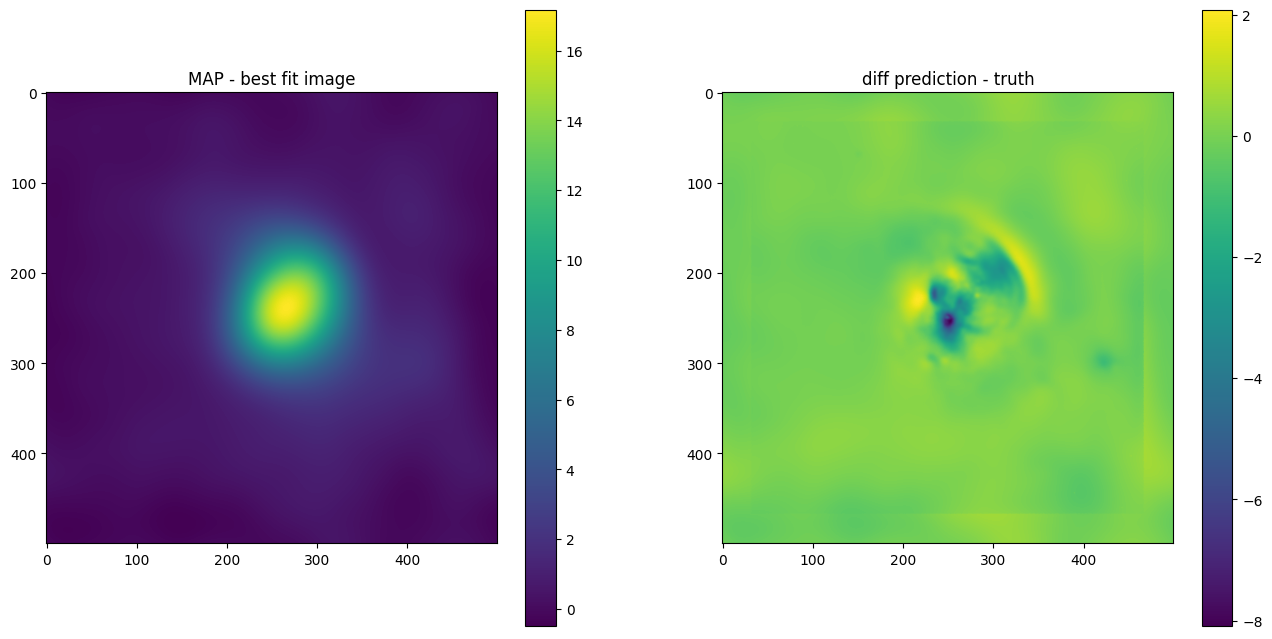

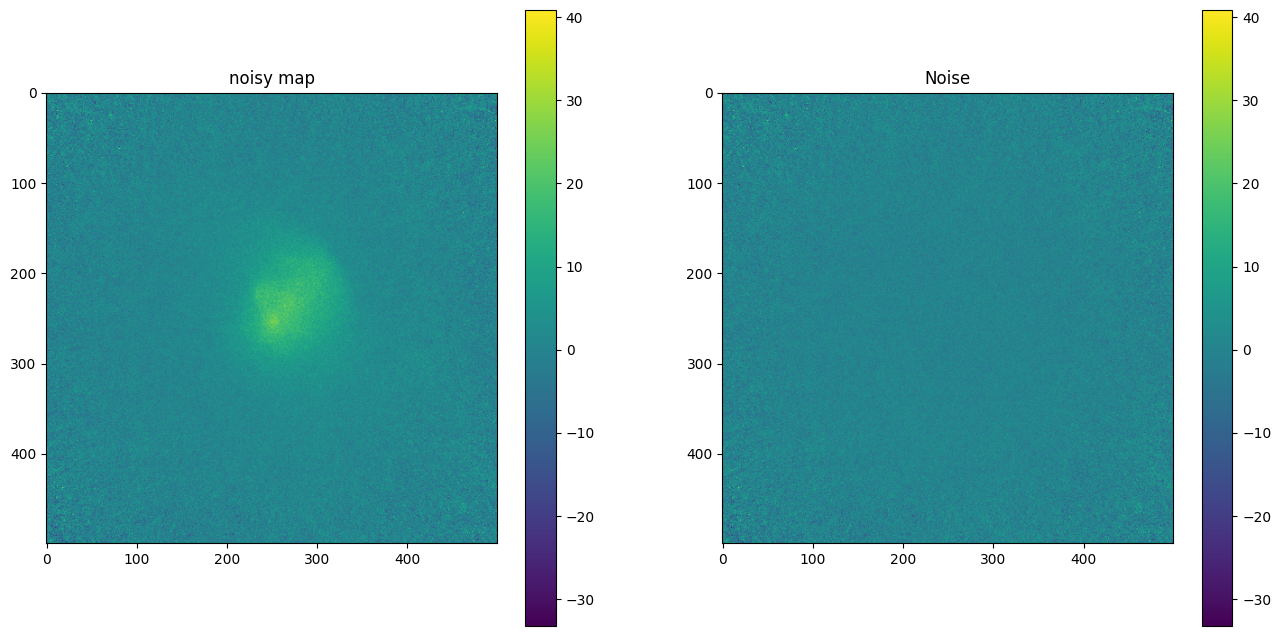

In [11]:
# plot maximum of posterior (mode)
sig_map = signal_response(samples.pos)
# sig_map = gp(samples.pos) # when splitting up in different field models

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(sig_map)
axes[0].title.set_text('MAP - best fit image')
fig.colorbar(im0)

im1 = axes[1].imshow(sig_map - mapdata_truth)
axes[1].title.set_text('diff prediction - truth')
fig.colorbar(im1)

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(mapdata_noised)
axes[0].title.set_text('noisy map')
fig.colorbar(im0)

im1 = axes[1].imshow(mapdata_noised - mapdata_truth)
axes[1].title.set_text('Noise')
fig.colorbar(im1)

plt.show()

In [12]:
assert False

AssertionError: 

In [ ]:
n_it = 6
# delta = 1e-4
delta = 1e-6
n_samples = 8 # no samples -> maximum aposteriory posterior

key, k_i, k_o = random.split(key, 3)

# callback fn for plotting during optimisation:
def callback(samples, opt_state):
    mean, std = jft.mean_and_std(tuple(gp(s) for s in samples))
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    im0 = axes[0].imshow(mean)
    axes[0].title.set_text('mean sample')
    fig.colorbar(im0)

    im1 = axes[1].imshow(std)
    axes[1].title.set_text('std sample')
    fig.colorbar(im1)
    
    plt.show()

samples, state = jft.optimize_kl(
    lh, # likelihood
    jft.Vector(lh.init(k_i)), # initial position in model space (initialisation)
    n_total_iterations=n_it, # no of optimisation steps (global)
    n_samples=n_samples, # draw samples
    key=k_o, # random jax init
    draw_linear_kwargs=dict( # sampling parameters
        cg_name="SL",
        cg_kwargs=dict(absdelta=delta * jft.size(lh.domain) / 10.0, maxiter=100),
    ),
    nonlinearly_update_kwargs=dict( # map from multivariate gaussian to more compl. distribution (coordinate transformations)
        minimize_kwargs=dict(
            name="SN",
            xtol=delta,
            cg_kwargs=dict(name=None),
            maxiter=5,
        )
    ),
    kl_kwargs=dict( # shift transformed multivar gauss to best match true posterior
        minimize_kwargs=dict(
            name="M", xtol=delta, cg_kwargs=dict(name=None), maxiter=100
        )
    ),
    sample_mode="nonlinear_resample", # how steps are combined (samples + nonlin + KL)
    callback=callback,
)

OPTIMIZE_KL: Starting 0001
SL: Iteration 0 ⛰:-1.4287e+05 Δ⛰:inf ➽:2.9209e-02
SL: Iteration 1 ⛰:-1.4500e+05 Δ⛰:2.1324e+03 ➽:2.9209e-02
SL: Iteration 2 ⛰:-1.4514e+05 Δ⛰:1.3948e+02 ➽:2.9209e-02
SL: Iteration 3 ⛰:-1.4558e+05 Δ⛰:4.4129e+02 ➽:2.9209e-02
SL: Iteration 4 ⛰:-1.4570e+05 Δ⛰:1.2235e+02 ➽:2.9209e-02
SL: Iteration 5 ⛰:-1.4578e+05 Δ⛰:7.8394e+01 ➽:2.9209e-02
SL: Iteration 6 ⛰:-1.4582e+05 Δ⛰:3.8715e+01 ➽:2.9209e-02
SL: Iteration 7 ⛰:-1.4585e+05 Δ⛰:2.8434e+01 ➽:2.9209e-02
SL: Iteration 8 ⛰:-1.4587e+05 Δ⛰:1.7796e+01 ➽:2.9209e-02
SL: Iteration 9 ⛰:-1.4588e+05 Δ⛰:1.3921e+01 ➽:2.9209e-02
SL: Iteration 10 ⛰:-1.4589e+05 Δ⛰:1.2740e+01 ➽:2.9209e-02
SL: Iteration 11 ⛰:-1.4590e+05 Δ⛰:3.8747e+00 ➽:2.9209e-02
SL: Iteration 12 ⛰:-1.4590e+05 Δ⛰:1.7430e+00 ➽:2.9209e-02
SL: Iteration 13 ⛰:-1.4590e+05 Δ⛰:2.8964e+00 ➽:2.9209e-02
SL: Iteration 14 ⛰:-1.4590e+05 Δ⛰:2.8819e-01 ➽:2.9209e-02
SL: Iteration 15 ⛰:-1.4590e+05 Δ⛰:1.1238e+00 ➽:2.9209e-02
SL: Iteration 16 ⛰:-1.4590e+05 Δ⛰:8.4751e-01 ➽:2.9209e-02
SL: 

KeyboardInterrupt: 

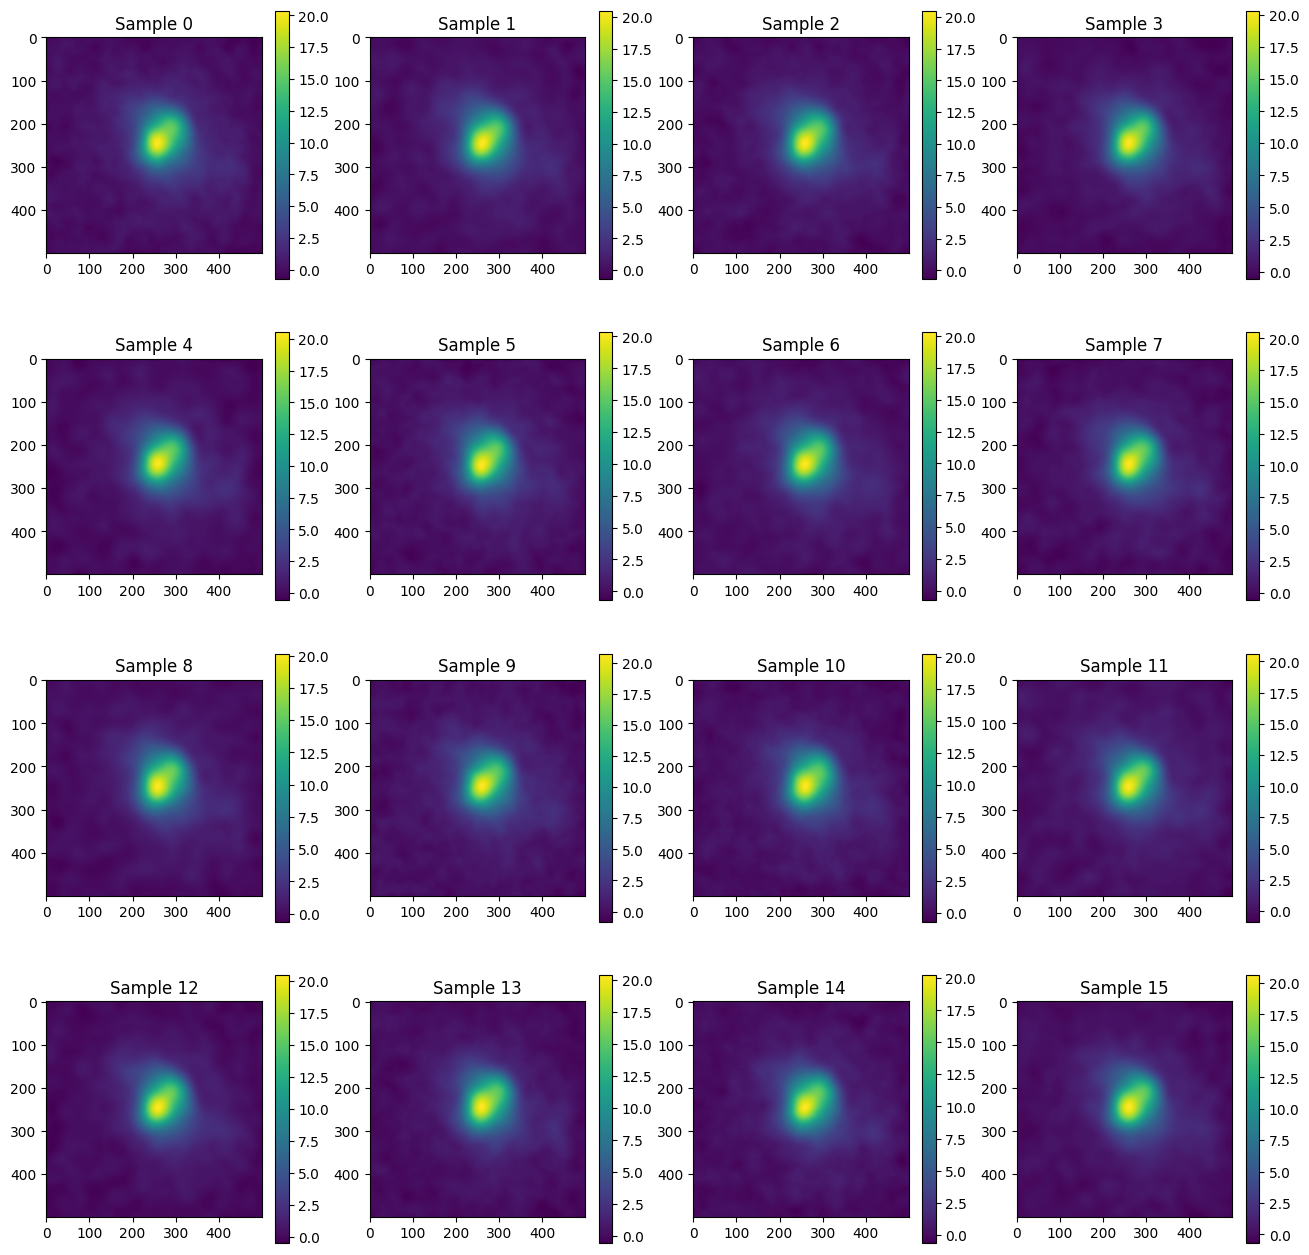

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

i = 0
for s in samples:
    # print(i//4, i%4)
    im = axes[i//4][i%4].imshow(gp(s))
    axes[i//4][i%4].title.set_text(f"Sample {i}")
    fig.colorbar(im)
    
    i += 1

plt.show()

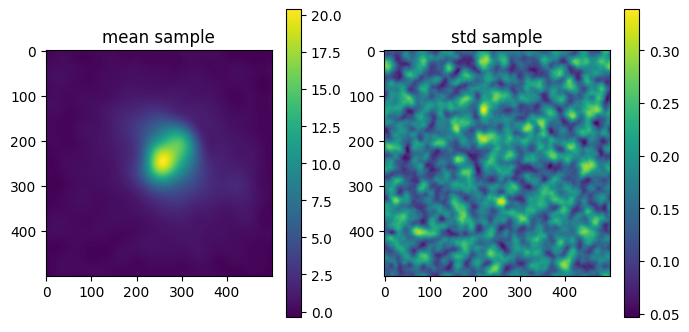

In [ ]:
mean, std = jft.mean_and_std(tuple(gp(s) for s in samples))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

im0 = axes[0].imshow(mean)
axes[0].title.set_text('mean sample')
fig.colorbar(im0)

im1 = axes[1].imshow(std)
axes[1].title.set_text('std sample')
fig.colorbar(im1)

plt.show()